# Polynomial regression 
多項式迴歸

In [40]:
import numpy as np
import matplotlib.pyplot as plt

## define data

In [41]:
np.random.seed(42)

m = 100
x1 = 10 * np.random.rand(m, 1) - 6
y = 10 + 6 * x1 + 5 * x1**2 + 30 * np.random.randn(m, 1)

In [42]:
x1[:5], y[:5]

(array([[-2.25459881],
        [ 3.50714306],
        [ 1.31993942],
        [-0.01341516],
        [-4.4398136 ]]),
 array([[ 24.49989818],
        [ 83.57290023],
        [ 29.38366014],
        [-49.70665855],
        [ 75.33068561]]))

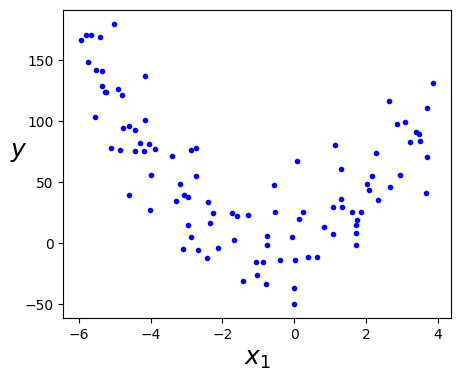

In [43]:
plt.figure(figsize=(5, 4))
plt.plot(x1, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

## data preprocessing

### feature polynomial 轉換 ( degree = 2 )  

In [44]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
x1_poly = poly.fit_transform(x1)

In [45]:
x1[0], x1_poly[0]

(array([-2.25459881]), array([-2.25459881,  5.0832158 ]))

### 標準化

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x1_poly_scaled = scaler.fit_transform(x1_poly)

In [47]:
scaler.mean_, scaler.scale_

(array([-1.29819257, 10.44679896]), array([2.95998227, 9.96932335]))

In [48]:
x1_poly[0], x1_poly_scaled[0]

(array([-2.25459881,  5.0832158 ]), array([-0.32311215, -0.53800875]))

## 使用 LR

In [49]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x1_poly_scaled, y)

lr_model

LinearRegression()

In [50]:
lr_model.intercept_, lr_model.coef_

(array([54.41242858]), array([[18.35364729, 56.79799107]]))

## 使用 SGD Regressor

In [51]:
from sklearn.linear_model import SGDRegressor

sgd_model = SGDRegressor()
sgd_model.fit(x1_poly_scaled, y.ravel())

sgd_model

SGDRegressor()

In [52]:
sgd_model.intercept_, sgd_model.coef_

(array([54.42616208]), array([17.96790146, 56.3731249 ]))

## Predict

若新資料要進行預測，需要先進行 Polynomial 後再進行 Standard scaler

In [53]:
x_new = [[-5], [1]]

x_new_poly = poly.transform(x_new)
x_new_poly_scaled = scaler.transform(x_new_poly)

x_new, x_new_poly, x_new_poly_scaled

([[-5], [1]],
 array([[-5., 25.],
        [ 1.,  1.]]),
 array([[-1.25061811,  1.45979828],
        [ 0.77642106, -0.94758677]]))

In [54]:
lr_predict = lr_model.predict(x_new_poly_scaled)
sgd_predict = sgd_model.predict(x_new_poly_scaled)

lr_predict, sgd_predict

(array([[114.37263433],
        [ 14.84156169]]),
 array([114.24856965,  14.95839157]))

### sklearn.pipline
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

In [57]:
from sklearn.pipeline import Pipeline

In [58]:
polynomial_regression_pipeline = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", StandardScaler()),
    ("lr_model", LinearRegression())
])

In [59]:
polynomial_regression_pipeline.fit(x1, y)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('lr_model', LinearRegression())])

In [64]:
polynomial_regression_pipeline["lr_model"].intercept_, polynomial_regression_pipeline["lr_model"].coef_

(array([54.41242858]), array([[18.35364729, 56.79799107]]))

In [65]:
polynomial_regression_pipeline.predict(x_new)

array([[114.37263433],
       [ 14.84156169]])

## show model

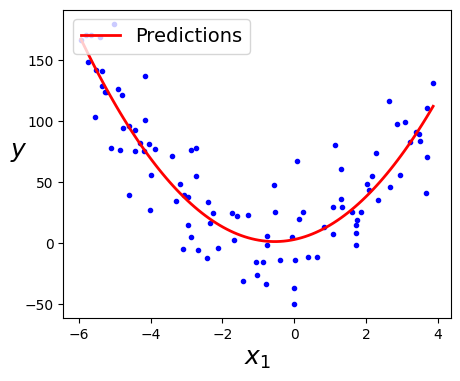

In [66]:
plt.figure(figsize=(5, 4))

x1s = np.linspace(x1.min(), x1.max(), 100).reshape(-1, 1)
y_pred = polynomial_regression_pipeline.predict(x1s)

plt.plot(x1, y, "b.")
plt.plot(x1s, y_pred, "r-", linewidth=2, label="Predictions")

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

plt.show()

以下是不太懂 `x1s = np.linspace(x1.min(), x1.max(), 100).reshape(-1, 1)` 到底為何要這麼做做的實驗，應該是因為原樣本並不是有照順序的 value！

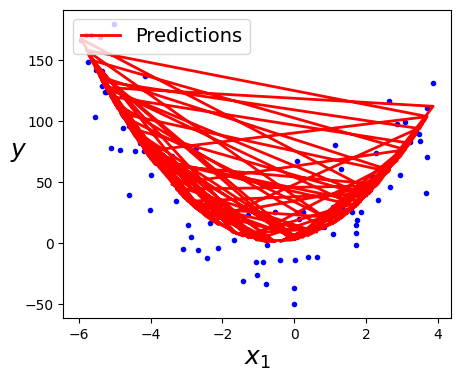

In [67]:
plt.figure(figsize=(5, 4))

# x1s = np.linspace(x1.min(), x1.max(), 100).reshape(-1, 1)
y_pred = polynomial_regression_pipeline.predict(x1)

plt.plot(x1, y, "b.")
plt.plot(x1, y_pred, "r-", linewidth=2, label="Predictions")

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

plt.show()